In [1]:
import pandas as pd
import numpy as np
import random
import nltk
import string
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
from sklearn import cluster
from sklearn import metrics

In [2]:
df = pd.read_csv("../Dataset/dataset.csv")
df = df.drop(columns="data")
df.head()

,author,lyrics,style,title
0,Midian Lima,"Amanheceu,Nada pesquei,Parecia ser apenas mais...",eletrônica,Não Pare
1,MC Doni,"Não adianta tu se declarar,Romance, compromiss...",eletrônica,Te Amo Sem Compromisso (To Nem Aí)
2,Sebastián Yatra,"I remember when I met you,I didn't wanna fall,...",eletrônica,My Only One (No Hay Nadie Más) (part. Isabela ...
3,Billie Eilish,"Thought I found a way,Thought I found a way ou...",eletrônica,Lovely (feat. Khalid)
4,Ed Sheeran,"I found a love for me,Darling, just dive right...",eletrônica,Perfect


In [3]:
df["style"].unique()

array(['eletrônica', 'cumbia', 'zouk', 'pop', 'zamba', 'bolero',
       'post-rock', 'alternativo', 'brega', 'country', 'blues', 'dance',
       'disco', 'cuarteto', 'trova', 'soul', 'salsa', 'ska', 'reggaeton',
       'rockabilly', 'reggae', 'tango', 'regional', 'rock', 'samba',
       'tecnopop', 'sertanejo', 'power-pop', 'ranchera', 'mpb',
       'mariachi', 'industrial', 'infantil', 'indie', 'house',
       'instrumental', 'jazz', 'pagode', 'mambo', 'psicodelia',
       'merengue', 'hardcore', 'grunge', 'funk', 'folk', 'emocore',
       'fado'], dtype=object)

## Reducing for 5 genres for runtime purpose

In [35]:
from functools import reduce
import operator

_id = reduce(
    operator.add,
    [
        df["style"] == "pop",
        df["style"] == "rock",
        df["style"] == "reggae",
        df["style"] == "indie",
        df["style"] == "country"
    ]
)
df = df.loc[_id]
df["style"].unique()

/Users/paulocarneiro/MusicClassifier/venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


array(['pop', 'country', 'reggae', 'rock', 'indie'], dtype=object)

In [36]:
def clean_string(sentence):
    if not isinstance(sentence, str):
        return ""
    for p in string.punctuation:
        sentence = sentence.replace(p, " ")
    sentence = sentence.replace("  ", " ")
    return sentence.lower()

In [41]:
# training using the entire dataset
data = df
tokens = []
for index, row in data.iterrows():
    tokens.append(nltk.word_tokenize(clean_string(row["lyrics"])) +  nltk.word_tokenize(row["title"]))
model_ = Word2Vec(tokens, min_count=1)
print(len(model_.wv.vocab))

35497


In [37]:
# training for just a sample of the dataset to tune the k param
data = df.sample(frac=0.01, random_state=1)
tokens = []
for index, row in data.iterrows():
    tokens.append(nltk.word_tokenize(clean_string(row["lyrics"])) +  nltk.word_tokenize(row["title"]))
model = Word2Vec(tokens, min_count=1)
print(len(model.wv.vocab))

2096


In [31]:
X = model[model.wv.vocab]

/Users/paulocarneiro/MusicClassifier/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


## Tunning the number of cluster of the k-means algorithm

Following this [article](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

In [32]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [33]:
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

Sum_of_squared_distances = []

K = range(1,int(len(model.wv.vocab) - 1), int(len(model.wv.vocab) * 0.1))
for k in K:
    print(f"----- Clustering for k = {k} -----")
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

----- Clustering for k = 1 -----
----- Clustering for k = 210 -----
----- Clustering for k = 419 -----
----- Clustering for k = 628 -----
----- Clustering for k = 837 -----
----- Clustering for k = 1046 -----
----- Clustering for k = 1255 -----
----- Clustering for k = 1464 -----
----- Clustering for k = 1673 -----
----- Clustering for k = 1882 -----
----- Clustering for k = 2091 -----


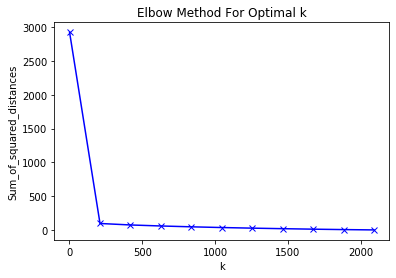

In [34]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Choose the k where sum_of_squared_distance tends to zero

In this case k = 400

k was estimated using 2k words. Making a linear aproximation for the entire dataset (35k words) k will be:

k =  7000

## Clustering the dataset

In [49]:
NUM_CLUSTERS = 15000

In [42]:
X = model[model_.wv.vocab]

/Users/paulocarneiro/MusicClassifier/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [50]:
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS, random_state=0, verbose=1)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 148.25441
start iteration
done sorting
end inner loop
Iteration 1, inertia 144.01576
start iteration
done sorting
end inner loop
Iteration 2, inertia 142.81326
start iteration
done sorting
end inner loop
Iteration 3, inertia 142.24237
start iteration
done sorting
end inner loop
Iteration 4, inertia 141.89207
start iteration
done sorting
end inner loop
Iteration 5, inertia 141.6943
start iteration
done sorting
end inner loop
Iteration 6, inertia 141.56676
start iteration
done sorting
end inner loop
Iteration 7, inertia 141.49693
start iteration
done sorting
end inner loop
Iteration 8, inertia 141.45023
start iteration
done sorting
end inner loop
Iteration 9, inertia 141.41116
start iteration
done sorting
end inner loop
Iteration 10, inertia 141.37943
start iteration
done sorting
end inner loop
Iteration 11, inertia 141.3581
start iteration
done sorting
end inner loop
Iteration 12, inertia 141.3404
s

done sorting
end inner loop
Iteration 22, inertia 141.13205
center shift 0.000000e+00 within tolerance 2.445014e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 148.16931
start iteration
done sorting
end inner loop
Iteration 1, inertia 143.71794
start iteration
done sorting
end inner loop
Iteration 2, inertia 142.50821
start iteration
done sorting
end inner loop
Iteration 3, inertia 141.96588
start iteration
done sorting
end inner loop
Iteration 4, inertia 141.67482
start iteration
done sorting
end inner loop
Iteration 5, inertia 141.50433
start iteration
done sorting
end inner loop
Iteration 6, inertia 141.41049
start iteration
done sorting
end inner loop
Iteration 7, inertia 141.3449
start iteration
done sorting
end inner loop
Iteration 8, inertia 141.30415
start iteration
done sorting
end inner loop
Iteration 9, inertia 141.2639
start iteration
done sorting
end inner loop
Iteration 10, inertia 141.23746
start iteration
done sorting
end inn

Iteration 13, inertia 141.00085
start iteration
done sorting
end inner loop
Iteration 14, inertia 140.99463
start iteration
done sorting
end inner loop
Iteration 15, inertia 140.98946
start iteration
done sorting
end inner loop
Iteration 16, inertia 140.98604
start iteration
done sorting
end inner loop
Iteration 17, inertia 140.98372
start iteration
done sorting
end inner loop
Iteration 18, inertia 140.98271
start iteration
done sorting
end inner loop
Iteration 19, inertia 140.98232
start iteration
done sorting
end inner loop
Iteration 20, inertia 140.98232
center shift 0.000000e+00 within tolerance 2.445014e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 147.58415
start iteration
done sorting
end inner loop
Iteration 1, inertia 143.21774
start iteration
done sorting
end inner loop
Iteration 2, inertia 142.02385
start iteration
done sorting
end inner loop
Iteration 3, inertia 141.5179
start iteration
done sorting
end inner loop
Iteration 4, 

## Saving the clusters in a json file

In [51]:
words = list(model.wv.vocab)
new_array = np.asarray(labels)
clusters = {}
clusters["clusters"] = {}
clusters["replace"] = {}
for i in range(NUM_CLUSTERS):
    ids_ = np.where(new_array == i)
    print(f"=========== Cluster {i} ========== ")
    for ids in ids_[0]:
        if i not in clusters["replace"]:
            clusters["replace"][i] = words[ids]
        print(words[ids])
        clusters["clusters"][words[ids]] = i
        
import json
with open("k_means_clusters.json", "w") as f:
    json.dump(clusters,f)

=========== Cluster 0 ========== 
heh
=========== Cluster 1 ========== 
alive
=========== Cluster 2 ========== 
heaven
=========== Cluster 3 ========== 
pois
=========== Cluster 4 ========== 
un
=========== Cluster 5 ========== 
camo
queek
Short
homegirls
fenomenal
deter
representative
=========== Cluster 6 ========== 
buttare
fäusten
urht
=========== Cluster 7 ========== 
toma
=========== Cluster 8 ========== 
clear
=========== Cluster 9 ========== 
children
=========== Cluster 10 ========== 
hurt
=========== Cluster 11 ========== 
una
=========== Cluster 12 ========== 
beats
=========== Cluster 13 ========== 
só
=========== Cluster 14 ========== 
didn
=========== Cluster 15 ========== 
)
=========== Cluster 16 ========== 
hacer
=========== Cluster 17 ========== 
angels
=========== Cluster 18 ========== 
took
=========== Cluster 19 ========== 
her
=========== Cluster 20 ========== 
somewhere
=========== Cluster 21 ========== 
perder
=========== Cluster 22 ========== 
before
==========

=========== Cluster 675 ========== 
meet
=========== Cluster 676 ========== 
deus
=========== Cluster 677 ========== 
fun
=========== Cluster 678 ========== 
happy
=========== Cluster 679 ========== 
already
=========== Cluster 680 ========== 
once
=========== Cluster 681 ========== 
nothin
=========== Cluster 682 ========== 
feet
=========== Cluster 683 ========== 
blood
=========== Cluster 684 ========== 
after
=========== Cluster 685 ========== 
tomorrow
=========== Cluster 686 ========== 
mundo
=========== Cluster 687 ========== 
fa
=========== Cluster 688 ========== 
holding
=========== Cluster 689 ========== 
ou
=========== Cluster 690 ========== 
front
=========== Cluster 691 ========== 
making
=========== Cluster 692 ========== 
river
=========== Cluster 693 ========== 
ver
=========== Cluster 694 ========== 
most
=========== Cluster 695 ========== 
mean
=========== Cluster 696 ========== 
bleed
=========== Cluster 697 ========== 
apart
=========== Cluster 698 ========== 
midni

=========== Cluster 1266 ========== 
anda
=========== Cluster 1267 ========== 
perdão
=========== Cluster 1268 ========== 
caminho
=========== Cluster 1269 ========== 
wo
=========== Cluster 1270 ========== 
dust
=========== Cluster 1271 ========== 
songs
=========== Cluster 1272 ========== 
qualquer
=========== Cluster 1273 ========== 
história
=========== Cluster 1274 ========== 
ba
=========== Cluster 1275 ========== 
algum
=========== Cluster 1276 ========== 
hillbilly
=========== Cluster 1277 ========== 
freedom
=========== Cluster 1278 ========== 
treat
=========== Cluster 1279 ========== 
walking
=========== Cluster 1280 ========== 
anybody
=========== Cluster 1281 ========== 
filled
=========== Cluster 1282 ========== 
simple
=========== Cluster 1283 ========== 
tais
=========== Cluster 1284 ========== 
held
=========== Cluster 1285 ========== 
child
=========== Cluster 1286 ========== 
magic
=========== Cluster 1287 ========== 
physically
pendurado
shintaro
sakamoto
==========

=========== Cluster 1862 ========== 
killing
=========== Cluster 1863 ========== 
gosto
=========== Cluster 1864 ========== 
write
=========== Cluster 1865 ========== 
thoughts
=========== Cluster 1866 ========== 
novo
=========== Cluster 1867 ========== 
espere
=========== Cluster 1868 ========== 
jealous
=========== Cluster 1869 ========== 
yayo
=========== Cluster 1870 ========== 
enemy
=========== Cluster 1871 ========== 
le
=========== Cluster 1872 ========== 
pouco
=========== Cluster 1873 ========== 
christafari
=========== Cluster 1874 ========== 
short
=========== Cluster 1875 ========== 
texas
=========== Cluster 1876 ========== 
bother
=========== Cluster 1877 ========== 
younger
=========== Cluster 1878 ========== 
ten
=========== Cluster 1879 ========== 
weak
=========== Cluster 1880 ========== 
reasons
=========== Cluster 1881 ========== 
whispers
=========== Cluster 1882 ========== 
voy
=========== Cluster 1883 ========== 
ass
=========== Cluster 1884 ========== 
rights


=========== Cluster 2405 ========== 
zinação
sentados
árabes
yemanjá
=========== Cluster 2406 ========== 
dice
=========== Cluster 2407 ========== 
pushed
=========== Cluster 2408 ========== 
rocka
=========== Cluster 2409 ========== 
shoulder
=========== Cluster 2410 ========== 
owe
=========== Cluster 2411 ========== 
further
=========== Cluster 2412 ========== 
covered
=========== Cluster 2413 ========== 
herbs
=========== Cluster 2414 ========== 
self
=========== Cluster 2415 ========== 
burned
=========== Cluster 2416 ========== 
castle
=========== Cluster 2417 ========== 
inútil
=========== Cluster 2418 ========== 
message
=========== Cluster 2419 ========== 
experts
philippines
principio
thai
vents
wordsagain
nearby
vocalize
Cantar
friso
colore
nicolas
rapidly
and﻿
oooooo
seios
alimentam
rudegirl
curtas
unsound
null
legais
enfrentou
ôôõ
Louca
laxed
selvagens
apparatus
bakers
cajoles
contractions
simplest
exorcised
=========== Cluster 2420 ========== 
wonderful
=========== Cluste

=========== Cluster 3055 ========== 
hardly
=========== Cluster 3056 ========== 
curar
=========== Cluster 3057 ========== 
bite
=========== Cluster 3058 ========== 
heroes
=========== Cluster 3059 ========== 
taller
=========== Cluster 3060 ========== 
mwah
=========== Cluster 3061 ========== 
rádio
=========== Cluster 3062 ========== 
undercover
=========== Cluster 3063 ========== 
dated
=========== Cluster 3064 ========== 
toes
=========== Cluster 3065 ========== 
muita
=========== Cluster 3066 ========== 
fingertips
=========== Cluster 3067 ========== 
fought
=========== Cluster 3068 ========== 
omega
=========== Cluster 3069 ========== 
flip
=========== Cluster 3070 ========== 
pele
=========== Cluster 3071 ========== 
shines
=========== Cluster 3072 ========== 
escola
=========== Cluster 3073 ========== 
cigarette
=========== Cluster 3074 ========== 
showed
=========== Cluster 3075 ========== 
confidence
=========== Cluster 3076 ========== 
lotta
=========== Cluster 3077 ========

=========== Cluster 3507 ========== 
enemies
=========== Cluster 3508 ========== 
primeiro
=========== Cluster 3509 ========== 
chosen
=========== Cluster 3510 ========== 
giddy
=========== Cluster 3511 ========== 
ouvido
=========== Cluster 3512 ========== 
/
=========== Cluster 3513 ========== 
rue
=========== Cluster 3514 ========== 
lick
=========== Cluster 3515 ========== 
karat
=========== Cluster 3516 ========== 
amanhã
=========== Cluster 3517 ========== 
chasin
=========== Cluster 3518 ========== 
sonhos
=========== Cluster 3519 ========== 
coloca
tolice
calou
vagaria
escada
restinga
zoa
=========== Cluster 3520 ========== 
ondas
=========== Cluster 3521 ========== 
speakers
=========== Cluster 3522 ========== 
daali
nabada
diideen
=========== Cluster 3523 ========== 
bitchin
=========== Cluster 3524 ========== 
raiva
=========== Cluster 3525 ========== 
sematary
=========== Cluster 3526 ========== 
That
=========== Cluster 3527 ========== 
billion
=========== Cluster 3528 ===

=========== Cluster 4042 ========== 
mile
=========== Cluster 4043 ========== 
void
=========== Cluster 4044 ========== 
comfort
=========== Cluster 4045 ========== 
frame
=========== Cluster 4046 ========== 
success
=========== Cluster 4047 ========== 
derrubando
=========== Cluster 4048 ========== 
desistir
=========== Cluster 4049 ========== 
direction
=========== Cluster 4050 ========== 
apredir
pneumonia
enseñado
pushes
onward
luzir
entristeceu
mexiam
ingerindo
desviante
periferia
cicatrizou
lululaiê
vestidos
disperdice
nacionalidade
esperada
moto
impressão
pelados
fascismo
panelão
replacement
bylittle
endoidecer
amem
combustível
1888
wesley
=========== Cluster 4051 ========== 
difícil
=========== Cluster 4052 ========== 
fiction
=========== Cluster 4053 ========== 
toffee
=========== Cluster 4054 ========== 
mexendo
=========== Cluster 4055 ========== 
denia
=========== Cluster 4056 ========== 
clareira
=========== Cluster 4057 ========== 
wisdom
=========== Cluster 4058 ========

=========== Cluster 4572 ========== 
Bad
=========== Cluster 4573 ========== 
sting
=========== Cluster 4574 ========== 
raah
Joe
dimaggio
conserva
eighty
Pull
reste
digne
oel
Minutes
Karma
fotico
hydro
jowny
turnpike
oublier
payé
toutes
rompes
trestle
viejos
sithi
giordano
caipira
cesar
Ver
Kajun
Walker
dialeto
Libertem
larmes
áfricaa
shiva
pecados
nomeada
thout
feal
Bandido
coleguismo
sombrios
egalité
essencialmente
klã
augen
cont
longuer
Bana
pauvres
pálido
pâturages
Barato
desqualificados
iléda
poços
Kingston
generación
despejando
dethroned
mormon
T'aime
falidas
Espero
mandigno
intensidade
incorporadas
saudável
Mora
índico
clandestina
stalls
Logic
=========== Cluster 4575 ========== 
marching
=========== Cluster 4576 ========== 
willow
=========== Cluster 4577 ========== 
dents
steals
revive
safest
baubles
theirbreath
1st
welfare
walkman
Jane
embryo
rears
forehead
sweepin
honoured
victimized
disfigured
disparado
nowhereland
snare
dats
pitter
remotely
slvery
nema
piled
relegation
==

=========== Cluster 4992 ========== 
rev
=========== Cluster 4993 ========== 
bunny
=========== Cluster 4994 ========== 
ouch
=========== Cluster 4995 ========== 
suffering
=========== Cluster 4996 ========== 
Style
Cruise
wonka
inventou
surdo
Christafari
neutro
looky
wheee
gozará
Y
carimbo
=========== Cluster 4997 ========== 
figura
=========== Cluster 4998 ========== 
exalando
=========== Cluster 4999 ========== 
blacked
=========== Cluster 5000 ========== 
prophets
=========== Cluster 5001 ========== 
greet
=========== Cluster 5002 ========== 
remenea
muere
cerró
=========== Cluster 5003 ========== 
shattered
=========== Cluster 5004 ========== 
meditation
=========== Cluster 5005 ========== 
siento
=========== Cluster 5006 ========== 
kouman
=========== Cluster 5007 ========== 
daisies
=========== Cluster 5008 ========== 
strengthen
=========== Cluster 5009 ========== 
notar
=========== Cluster 5010 ========== 
drama
=========== Cluster 5011 ========== 
harmonia
=========== Cluster

=========== Cluster 5538 ========== 
soundtrack
=========== Cluster 5539 ========== 
size
=========== Cluster 5540 ========== 
enamorado
=========== Cluster 5541 ========== 
prize
=========== Cluster 5542 ========== 
harmony
=========== Cluster 5543 ========== 
daily
=========== Cluster 5544 ========== 
ting
=========== Cluster 5545 ========== 
rodoviária
=========== Cluster 5546 ========== 
diggin
=========== Cluster 5547 ========== 
cell
=========== Cluster 5548 ========== 
ditch
=========== Cluster 5549 ========== 
slim
=========== Cluster 5550 ========== 
ticky
=========== Cluster 5551 ========== 
clan
=========== Cluster 5552 ========== 
llama
=========== Cluster 5553 ========== 
capturer
=========== Cluster 5554 ========== 
scary
=========== Cluster 5555 ========== 
dodge
=========== Cluster 5556 ========== 
seduction
=========== Cluster 5557 ========== 
cielo
=========== Cluster 5558 ========== 
teardrop
=========== Cluster 5559 ========== 
Know
=========== Cluster 5560 ========

=========== Cluster 5993 ========== 
Nightingale
Consideration
fuc
Southbound
ee
Speechless
privada
cients
desgovernado
Armonia
swiss
battling
occupation
Cyclone
tussle
rawkus
bipolar
cyrus
=========== Cluster 5994 ========== 
guessed
=========== Cluster 5995 ========== 
craze
=========== Cluster 5996 ========== 
orbit
=========== Cluster 5997 ========== 
usd
fpi
yoi
doni
provide
=========== Cluster 5998 ========== 
interupting
holies
andi
waterside
sophomore
onefall
punchin
indiscipline
toiling
companheiros
6x
applies
artists
artifacts
=========== Cluster 5999 ========== 
severed
=========== Cluster 6000 ========== 
chick
=========== Cluster 6001 ========== 
reino
=========== Cluster 6002 ========== 
position
=========== Cluster 6003 ========== 
peacefully
=========== Cluster 6004 ========== 
sung
=========== Cluster 6005 ========== 
wearin
=========== Cluster 6006 ========== 
regretting
=========== Cluster 6007 ========== 
séri
=========== Cluster 6008 ========== 
burukutu
==========

=========== Cluster 6442 ========== 
hecho
=========== Cluster 6443 ========== 
dunno
=========== Cluster 6444 ========== 
princípios
=========== Cluster 6445 ========== 
communicate
=========== Cluster 6446 ========== 
flown
=========== Cluster 6447 ========== 
complicate
=========== Cluster 6448 ========== 
Roll
Moment
=========== Cluster 6449 ========== 
ihr
=========== Cluster 6450 ========== 
bluff
=========== Cluster 6451 ========== 
training
=========== Cluster 6452 ========== 
fond
=========== Cluster 6453 ========== 
meek
=========== Cluster 6454 ========== 
shirts
=========== Cluster 6455 ========== 
somente
=========== Cluster 6456 ========== 
desconhecido
tropeçar
apanha
responsável
unirá
solitário
torço
aconchego
fundamento
=========== Cluster 6457 ========== 
desculpas
=========== Cluster 6458 ========== 
gypsy
=========== Cluster 6459 ========== 
microphone
=========== Cluster 6460 ========== 
arrive
=========== Cluster 6461 ========== 
shackles
=========== Cluster 6462 

=========== Cluster 6855 ========== 
storming
=========== Cluster 6856 ========== 
deepest
=========== Cluster 6857 ========== 
rejoice
=========== Cluster 6858 ========== 
huntin
=========== Cluster 6859 ========== 
prefiro
=========== Cluster 6860 ========== 
moses
=========== Cluster 6861 ========== 
vapor
=========== Cluster 6862 ========== 
soltam
=========== Cluster 6863 ========== 
rational
=========== Cluster 6864 ========== 
radioactive
=========== Cluster 6865 ========== 
exes
=========== Cluster 6866 ========== 
rumo
=========== Cluster 6867 ========== 
rosas
buckles
California
Brown
babyface
Nessa
Série
Ending
rednex
clivi
aure
memorie
aage
intuitivo
“
sadd
dôni
oregon
goodlovin
momentary
firlessiranna
faressu
=========== Cluster 6868 ========== 
luxury
=========== Cluster 6869 ========== 
hire
=========== Cluster 6870 ========== 
Kiss
=========== Cluster 6871 ========== 
bub
=========== Cluster 6872 ========== 
egoísta
Vou
hooker
piedi
philly
Atrás
ritual
dining
atura
iaô


=========== Cluster 7295 ========== 
ru–
avuto
acariciando
comodidad
devuelve
rumores
besitos
fotografía
aprieto
fiebre
podré
labial
quedarás
llegarías
lloras
Duele
teatro
fumamo
dejándote
labia
rabia
cobraras
dynamita
toas
locuras
sexys
empecemos
andrea
famiglia
permíteme
cosasi
2030
chiquillo
luchando
Échame
limosna
preciosa
pĺastico
curo
jugó
soigne
minables
moindre
était
frustración
habia
Prisões
acércate
sonidos
kohodo
diste
montañas
recibí
cuidarte
embargo
=========== Cluster 7296 ========== 
faced
=========== Cluster 7297 ========== 
fuerte
=========== Cluster 7298 ========== 
conversar
=========== Cluster 7299 ========== 
mommy
=========== Cluster 7300 ========== 
rizzla
=========== Cluster 7301 ========== 
bein
=========== Cluster 7302 ========== 
justify
=========== Cluster 7303 ========== 
cicatriz
=========== Cluster 7304 ========== 
adorada
=========== Cluster 7305 ========== 
gut
=========== Cluster 7306 ========== 
bebedeira
=========== Cluster 7307 ========== 
liberty
=

=========== Cluster 7874 ========== 
hei
=========== Cluster 7875 ========== 
carne
=========== Cluster 7876 ========== 
lindas
=========== Cluster 7877 ========== 
settles
=========== Cluster 7878 ========== 
cachoeira
=========== Cluster 7879 ========== 
Bout
Amen
Hurt
Start
Snow
Hell
Texas
While
Letter
Gente
Lana
partiality
Different
=========== Cluster 7880 ========== 
clapping
=========== Cluster 7881 ========== 
despair
=========== Cluster 7882 ========== 
enteré
=========== Cluster 7883 ========== 
marco
=========== Cluster 7884 ========== 
breathes
=========== Cluster 7885 ========== 
Swish
=========== Cluster 7886 ========== 
quizás
=========== Cluster 7887 ========== 
caer
=========== Cluster 7888 ========== 
IDFC
=========== Cluster 7889 ========== 
Te
=========== Cluster 7890 ========== 
psycho
=========== Cluster 7891 ========== 
temperature
=========== Cluster 7892 ========== 
dorme
=========== Cluster 7893 ========== 
sócio
=========== Cluster 7894 ========== 
galang
===

perdões
aportei
corrói
escondia
calei
sony
imprisoning
cobrirá
ocupar
separates
iconic
Bel
robbed
Name/
monumento
=========== Cluster 8179 ========== 
donjae
fifties
inescapable
oohhh
trashy
succesful
aimless
jerk
lovesick
stalker
bigotry
hyperventilate
asleepin
vegetarian
streak
wah
urchin
motorway
dalmatian
Boombastic
dystopic
publicise
terrific
carefree
forsure
Loser
indignant
irate
spacing
phases
=========== Cluster 8180 ========== 
comb
=========== Cluster 8181 ========== 
yeux
=========== Cluster 8182 ========== 
stiff
necked
=========== Cluster 8183 ========== 
asneiras
=========== Cluster 8184 ========== 
strut
=========== Cluster 8185 ========== 
doy
=========== Cluster 8186 ========== 
boombastic
=========== Cluster 8187 ========== 
Girls
=========== Cluster 8188 ========== 
prescription
=========== Cluster 8189 ========== 
flashbacks
cans
farrell
chlorine
=========== Cluster 8190 ========== 
confession
=========== Cluster 8191 ========== 
segredos
=========== Cluster 8192 ==

=========== Cluster 8538 ========== 
stance
=========== Cluster 8539 ========== 
mistreated
Hallowed
seekers
=========== Cluster 8540 ========== 
revenge
=========== Cluster 8541 ========== 
cuidao
=========== Cluster 8542 ========== 
devia
=========== Cluster 8543 ========== 
lows
=========== Cluster 8544 ========== 
gba
kekere
kerewawo
atu
=========== Cluster 8545 ========== 
transformar
=========== Cluster 8546 ========== 
invisalign
=========== Cluster 8547 ========== 
51
=========== Cluster 8548 ========== 
togo
=========== Cluster 8549 ========== 
chá
=========== Cluster 8550 ========== 
ism
=========== Cluster 8551 ========== 
pais
=========== Cluster 8552 ========== 
carente
=========== Cluster 8553 ========== 
ciudad
=========== Cluster 8554 ========== 
embrazando
brinco
seleção
munido
bigode
perchè
campanha
velocidade
tesão
mestre
carlos
dezembro
vinha
=========== Cluster 8555 ========== 
copy
=========== Cluster 8556 ========== 
embarrassed
=========== Cluster 8557 =========

=========== Cluster 9032 ========== 
união
=========== Cluster 9033 ========== 
alguien
=========== Cluster 9034 ========== 
capa
=========== Cluster 9035 ========== 
Late
Forgotten
Soon
Lights
Guy
Loved
Nice
Along
Send
=========== Cluster 9036 ========== 
kélé
=========== Cluster 9037 ========== 
tatá
=========== Cluster 9038 ========== 
haha
=========== Cluster 9039 ========== 
lux
=========== Cluster 9040 ========== 
crow
=========== Cluster 9041 ========== 
folhinhas
=========== Cluster 9042 ========== 
poppin
=========== Cluster 9043 ========== 
brilhos
=========== Cluster 9044 ========== 
villain
=========== Cluster 9045 ========== 
posto
=========== Cluster 9046 ========== 
coward
=========== Cluster 9047 ========== 
cashed
=========== Cluster 9048 ========== 
sido
=========== Cluster 9049 ========== 
alot
=========== Cluster 9050 ========== 
freaks
mare
barrow
marketplace
shaggers
=========== Cluster 9051 ========== 
lì
=========== Cluster 9052 ========== 
sixth
=========== Clu

=========== Cluster 9405 ========== 
matthew
Ben
fiery
timin
chang
bongoes
initialized
bendable
leech
falcon
=========== Cluster 9406 ========== 
doomed
=========== Cluster 9407 ========== 
nations
=========== Cluster 9408 ========== 
princesa
=========== Cluster 9409 ========== 
stoppin
=========== Cluster 9410 ========== 
pump
=========== Cluster 9411 ========== 
cursing
=========== Cluster 9412 ========== 
flooding
=========== Cluster 9413 ========== 
happenin
=========== Cluster 9414 ========== 
politely
=========== Cluster 9415 ========== 
dolphins
=========== Cluster 9416 ========== 
bacardi
=========== Cluster 9417 ========== 
allah
=========== Cluster 9418 ========== 
arching
dentist
procedure
sneakin
demanding
thrity
beets
scarn
chimp
contém
chata
wooga
kingdome
freezin
intimidate
spewing
=========== Cluster 9419 ========== 
Our
oscurità
stretti
vere
salince
pendi
petto
tteonago
soffrire
samson
wastes
=========== Cluster 9420 ========== 
taxi
=========== Cluster 9421 =========

=========== Cluster 9715 ========== 
persuade
imperfection
letdowns
thrive
threaten
outcomes
comprehensive
pals
=========== Cluster 9716 ========== 
abra
=========== Cluster 9717 ========== 
slum
=========== Cluster 9718 ========== 
scarborough
=========== Cluster 9719 ========== 
yai
=========== Cluster 9720 ========== 
flattery
whorish
coldest
matchbook
anointed
dreadful
lightining
pints
leverage
lodged
europe
escapes
energies
labor
=========== Cluster 9721 ========== 
minister
=========== Cluster 9722 ========== 
fighters
=========== Cluster 9723 ========== 
offered
ronnie
pitchforks
trips
mates
unity
sinful
gourmet
icons
starlets
=========== Cluster 9724 ========== 
depending
=========== Cluster 9725 ========== 
fazia
=========== Cluster 9726 ========== 
caminhando
=========== Cluster 9727 ========== 
amarela
=========== Cluster 9728 ========== 
perrea
gran
=========== Cluster 9729 ========== 
exagero
=========== Cluster 9730 ========== 
petrified
=========== Cluster 9731 =========

=========== Cluster 10199 ========== 
laiá
=========== Cluster 10200 ========== 
doer
=========== Cluster 10201 ========== 
erros
=========== Cluster 10202 ========== 
frío
=========== Cluster 10203 ========== 
elses
=========== Cluster 10204 ========== 
dispara
=========== Cluster 10205 ========== 
soulmate
=========== Cluster 10206 ========== 
mistakin
=========== Cluster 10207 ========== 
vagabond
cavar
tags
Boogie
honkin
Prayers
Knee
Coisa
banu
Kelly
sandwich
croakin
permanecendo
fishes
Dizer
muçulmano
auch
ornery
=========== Cluster 10208 ========== 
abrace
=========== Cluster 10209 ========== 
wits
=========== Cluster 10210 ========== 
materialize
=========== Cluster 10211 ========== 
cliff
=========== Cluster 10212 ========== 
secure
=========== Cluster 10213 ========== 
bathin
memoried
=========== Cluster 10214 ========== 
libertação
=========== Cluster 10215 ========== 
alibis
=========== Cluster 10216 ========== 
tornou
=========== Cluster 10217 ========== 
ziggens
==========

lidar
habilidade
=========== Cluster 10611 ========== 
wired
=========== Cluster 10612 ========== 
proudly
=========== Cluster 10613 ========== 
canciones
=========== Cluster 10614 ========== 
avisei
=========== Cluster 10615 ========== 
sentar
=========== Cluster 10616 ========== 
Wanted
=========== Cluster 10617 ========== 
lemons
=========== Cluster 10618 ========== 
gwan
=========== Cluster 10619 ========== 
Victoria
Roadrunning
Vogue
Table
Dude
Cha
Hips
Goin
haaan
T.G.I.F
Cure
dabada
foerever
Gettin
Bunny
M
Enamoré
ZAYN
Colbie
Flash
coons
Border
Laugh
Bublé
perfumes
Judge
Liga
Emicida
Tv
Opera
Acidente
Hills
survivin´
Promessas
Chain
Dragon
orgulhosos
Calle
consumidores
Sold
Tiger
Viceroy
Dolls
Shadows
Fault
Arab
Strap
Robot
Edge
Hanging
Parece
Rains
Castamere
Iludo
Scream
Half
Dancefloor
Blackest
Honeymoon
Salt
cummin
=========== Cluster 10620 ========== 
tomava
correu
iremos
gatilho
cachimbo
molejo
=========== Cluster 10621 ========== 
reachin
=========== Cluster 10622 =========

dy
atual
musiquinha
ocupado
Ditadura
Televisão
imperial
devastação
invesão
mija
fardo
deniakes
berberes
sóis
credo
Floresta
marcha
=========== Cluster 10962 ========== 
layers
=========== Cluster 10963 ========== 
insure
=========== Cluster 10964 ========== 
sabiá
=========== Cluster 10965 ========== 
haver
=========== Cluster 10966 ========== 
youths
=========== Cluster 10967 ========== 
adds
=========== Cluster 10968 ========== 
alimentar
=========== Cluster 10969 ========== 
colhendo
=========== Cluster 10970 ========== 
diferentes
=========== Cluster 10971 ========== 
rebolo
=========== Cluster 10972 ========== 
redes
=========== Cluster 10973 ========== 
fila
=========== Cluster 10974 ========== 
eternidade
=========== Cluster 10975 ========== 
itt
=========== Cluster 10976 ========== 
sentem
=========== Cluster 10977 ========== 
sweating
=========== Cluster 10978 ========== 
daisy
=========== Cluster 10979 ========== 
ideals
=========== Cluster 10980 ========== 
'Round
Step
picke

=========== Cluster 11387 ========== 
faithfully
=========== Cluster 11388 ========== 
pastries
=========== Cluster 11389 ========== 
pouquinho
=========== Cluster 11390 ========== 
ding
=========== Cluster 11391 ========== 
beck
=========== Cluster 11392 ========== 
charme
Talk
viveu
biquíni
Guerreiro
cabala
molecada
parecendo
industrial
dever
convivendo
rampaz
=========== Cluster 11393 ========== 
sundress
=========== Cluster 11394 ========== 
aways
natures
upright
insensitive
strangling
belladonna
comrade
Draw
quity
inequity
replaceable
mentally
anastasia
thoughtful
bits
disarming
cita
=========== Cluster 11395 ========== 
lifeless
=========== Cluster 11396 ========== 
magazines
=========== Cluster 11397 ========== 
proclamation
=========== Cluster 11398 ========== 
voce
bangalô
noutro
velhinho
buteco
transmissão
represente
=========== Cluster 11399 ========== 
allegation
=========== Cluster 11400 ========== 
curry
=========== Cluster 11401 ========== 
fountains
=========== Cluster 

=========== Cluster 11791 ========== 
descartável
ensoberbece
=========== Cluster 11792 ========== 
jus
=========== Cluster 11793 ========== 
coping
=========== Cluster 11794 ========== 
groovy
coroado
siting
fluído
obstáculo
candomblé
refletia
impregnado
raiou
requinte
velar
estridente
paradoxo
Photograph
advogado
activate
orgânico
mensageiro
féu
blefe
pesca
tubarão
pergunte
costumo
senha
=========== Cluster 11795 ========== 
ham
=========== Cluster 11796 ========== 
origami
=========== Cluster 11797 ========== 
academia
Cobertor
assanhar
Apaga
satisfez
bebezinho
cunhado
deliberada
arretado
pavor
barquinho
elementos
nado
belchior
prometa
inflama
anotado
desejando
marrom
ensine
prisioneiro
nexo
ajeitou
católico
secam
recanto
barraquinho
banhar
Versos
espalho
cálice
previ
=========== Cluster 11798 ========== 
metamorfose
=========== Cluster 11799 ========== 
tingle
backhoe
crisps
restocking
knit
Talking
swampland
helmet
bangs
radiohead
sails
hushing
equity
´round
haido
specially
psyched

=========== Cluster 12165 ========== 
Chatty
=========== Cluster 12166 ========== 
hound
=========== Cluster 12167 ========== 
consegui
=========== Cluster 12168 ========== 
farms
=========== Cluster 12169 ========== 
mandar
=========== Cluster 12170 ========== 
tik
=========== Cluster 12171 ========== 
importado
=========== Cluster 12172 ========== 
iluminava
=========== Cluster 12173 ========== 
trará
=========== Cluster 12174 ========== 
terrorize
=========== Cluster 12175 ========== 
colt
=========== Cluster 12176 ========== 
vent
=========== Cluster 12177 ========== 
heres
=========== Cluster 12178 ========== 
callar
tualla
carimbado
avaliado
rotulado
parará
antigas
=========== Cluster 12179 ========== 
achou
=========== Cluster 12180 ========== 
Right
=========== Cluster 12181 ========== 
guards
=========== Cluster 12182 ========== 
mondays
=========== Cluster 12183 ========== 
White
=========== Cluster 12184 ========== 
chifre
=========== Cluster 12185 ========== 
aiêêê
========

=========== Cluster 12479 ========== 
badman
=========== Cluster 12480 ========== 
gu
=========== Cluster 12481 ========== 
abajo
=========== Cluster 12482 ========== 
gwaan
=========== Cluster 12483 ========== 
similar
=========== Cluster 12484 ========== 
profession
flagged
beguiling
3030
nightstand
suds
maxin
relaxin
bacon
transmit
=========== Cluster 12485 ========== 
slowed
=========== Cluster 12486 ========== 
nightlife
=========== Cluster 12487 ========== 
apaixonado
=========== Cluster 12488 ========== 
underestimate
=========== Cluster 12489 ========== 
duty
=========== Cluster 12490 ========== 
eileen
=========== Cluster 12491 ========== 
pobres
=========== Cluster 12492 ========== 
modernity
=========== Cluster 12493 ========== 
disconnected
candidate
banged
rephrase
encourage
prejudice
compensate
dancers
=========== Cluster 12494 ========== 
Stay
=========== Cluster 12495 ========== 
caesar
=========== Cluster 12496 ========== 
provas
=========== Cluster 12497 ========== 
t

Gospel
Ridge
Campanha
zog
Kids
Rainbow
inked
Thriller
Poker
trippie
phoenix
Sólo
jhn
Assurance
Pirata
Espírito
Amigo
lucro
Preto
cutchi
Baleia
gushing
basses
charbon
Carnavais
virus
Snafu
Sébé
Allah
Journey
Travelers
acaieie
Deve
andante
educar
Rie
Crawling
neutral
conduct
kallinger
coloring
=========== Cluster 12885 ========== 
Para
=========== Cluster 12886 ========== 
gripping
=========== Cluster 12887 ========== 
catherine
=========== Cluster 12888 ========== 
enters
=========== Cluster 12889 ========== 
youngest
=========== Cluster 12890 ========== 
coon
=========== Cluster 12891 ========== 
14
=========== Cluster 12892 ========== 
devastation
=========== Cluster 12893 ========== 
trombeta
=========== Cluster 12894 ========== 
hagan
=========== Cluster 12895 ========== 
Grande
=========== Cluster 12896 ========== 
bloodstained
=========== Cluster 12897 ========== 
busque
=========== Cluster 12898 ========== 
celebrity
=========== Cluster 12899 ========== 
lição
=========== Cluster

chime
germs
seals
venture
cured
reveries
compton
vehicles
​it
lids
=========== Cluster 13267 ========== 
views
=========== Cluster 13268 ========== 
baptism
=========== Cluster 13269 ========== 
slack
=========== Cluster 13270 ========== 
humilhado
tufão
agonizou
sotaque
caiagangue
antiga
nêgo
criação
transcendência
moderna
microscópio
huuuum
tema
=========== Cluster 13271 ========== 
leggo
=========== Cluster 13272 ========== 
suíno
cuspiu
radinho
caísse
botou
reproduz
=========== Cluster 13273 ========== 
dunking
delegates
=========== Cluster 13274 ========== 
aquecer
=========== Cluster 13275 ========== 
deflate
=========== Cluster 13276 ========== 
contemplar
=========== Cluster 13277 ========== 
robocop
=========== Cluster 13278 ========== 
april
=========== Cluster 13279 ========== 
aceleraram
=========== Cluster 13280 ========== 
attendence
=========== Cluster 13281 ========== 
frames
=========== Cluster 13282 ========== 
puff
=========== Cluster 13283 ========== 
spectacle
====

amizades
cometas
=========== Cluster 13641 ========== 
mutilation
=========== Cluster 13642 ========== 
uponthe
=========== Cluster 13643 ========== 
té
=========== Cluster 13644 ========== 
possessions
=========== Cluster 13645 ========== 
newborn
=========== Cluster 13646 ========== 
pageant
=========== Cluster 13647 ========== 
zebu
=========== Cluster 13648 ========== 
penned
boost
=========== Cluster 13649 ========== 
tracking
=========== Cluster 13650 ========== 
firecracker
=========== Cluster 13651 ========== 
Somewhere
=========== Cluster 13652 ========== 
established
=========== Cluster 13653 ========== 
ranking
=========== Cluster 13654 ========== 
slumber
=========== Cluster 13655 ========== 
Everybody
=========== Cluster 13656 ========== 
caíram
=========== Cluster 13657 ========== 
forsaking
=========== Cluster 13658 ========== 
equally
=========== Cluster 13659 ========== 
winters
Cryin
permitido
piram
parti
diálogo
imaginem
estaremos
sutilmente
crenças
luas
inglaterra
=

Joana
matisyahu
respectable
mísera
Rockstar
pupila
Poucos
Yard
Fácil
Tirou
considerados
kight
Ironic
x5
sestrosa
espelhar
pombinha
pitchula
legalzão
fiorucci
justifica
Piano
Skanking
suaves
tensos
gravada
Leão
dados
choramos
Jogar
Ir
Ambulante
Conserto
propícia
visualizar
spanner
Chocolate
Spectrum
Crystals
uice
variation
micos
faker
Dick
=========== Cluster 14008 ========== 
agradeça
=========== Cluster 14009 ========== 
interpretation
=========== Cluster 14010 ========== 
dodging
=========== Cluster 14011 ========== 
flush
stickup
hattie
usual
scoot
saké
homework
yourough
acclamation
backache
raincloud
breathed
lyric
impractical
flask
ruse
gawking
guestroom
friends‚
cursive
=========== Cluster 14012 ========== 
rackin
=========== Cluster 14013 ========== 
akon
=========== Cluster 14014 ========== 
federal
=========== Cluster 14015 ========== 
fizemos
=========== Cluster 14016 ========== 
mush
=========== Cluster 14017 ========== 
passin
=========== Cluster 14018 ========== 
crimes
==

=========== Cluster 14328 ========== 
flu
wicker
=========== Cluster 14329 ========== 
beacon
=========== Cluster 14330 ========== 
ligação
=========== Cluster 14331 ========== 
florir
=========== Cluster 14332 ========== 
adivinhar
galinha
veias
passaporte
neymara
plantou
funcionar
nativo
reze
burguesia
embarquei
=========== Cluster 14333 ========== 
apology
=========== Cluster 14334 ========== 
expõe
alegres
truque
=========== Cluster 14335 ========== 
neglectful
=========== Cluster 14336 ========== 
eletric
=========== Cluster 14337 ========== 
pular
=========== Cluster 14338 ========== 
bê
=========== Cluster 14339 ========== 
dejaron
jode
Vacilei
rededor
hazmat
projeto
velhice
dissonante
desperdiçar
importância
trotted
nanã
flare
charco
rag
reconquistarem
aprenderem
vendido
millenial
sentient
Favourite
synthesiser
cakewalk
=========== Cluster 14340 ========== 
meteor
=========== Cluster 14341 ========== 
nurses
=========== Cluster 14342 ========== 
whining
=========== Cluster 1434

decimal
chegados
egito
nazistas
übermenschen
xhunga
molduras
Contra
Chamas
quintas
jewelers
Pergunto
anormais
comprexos
malhados
Rat
awaiting
uolof
vaidosas
indumentárias
africanas
fluminense
Coast
yoake
glaze
shrivelled
damages
wining
National
=========== Cluster 14669 ========== 
Johnny
=========== Cluster 14670 ========== 
indefesa
semanas
=========== Cluster 14671 ========== 
pun
=========== Cluster 14672 ========== 
corais
Tô
whales
cuidando
=========== Cluster 14673 ========== 
stormwind
=========== Cluster 14674 ========== 
slayin
deathless
sinker
botox
foundations
hookers
lax
1950
lupita
whipper
hike
disabled
baroness
sally
lilo
hitchhiking
monogrammed
sauna
efficiency
aquamarine
hephaestion
howled
=========== Cluster 14675 ========== 
nao
=========== Cluster 14676 ========== 
justamente
murro
tlc
Problema
Aliado
fundos
saibro
embaçado
interestelar
orçamento
recebeu
swaping
punição
Nosso
abobado
guardiões
oriental
Blitzkrieg
delato
reivindicar
matamos
seguiremos
aeon
lava
incon

=========== Cluster 14944 ========== 
civilized
=========== Cluster 14945 ========== 
pendurados
figuração
=========== Cluster 14946 ========== 
jumpers
=========== Cluster 14947 ========== 
hassled
trotting
=========== Cluster 14948 ========== 
dennis
=========== Cluster 14949 ========== 
handy
=========== Cluster 14950 ========== 
p90x
=========== Cluster 14951 ========== 
dow
wherefore
=========== Cluster 14952 ========== 
dará
=========== Cluster 14953 ========== 
sorted
=========== Cluster 14954 ========== 
enfiou
demonstrar
mereço
=========== Cluster 14955 ========== 
mercury
=========== Cluster 14956 ========== 
softest
=========== Cluster 14957 ========== 
Cavalo
Mangalarga
Ka-ching
kosis
estilhaçou
atlantique
bakat
Fumaça
drizzle
testemunhar
Negro
maliciously
salary
wisemen
Shaka
repare
realistic
mejuss
raios
conquistando
tenebroso
Rio
geoncide
trilogy
discotheque
=========== Cluster 14958 ========== 
escaped
=========== Cluster 14959 ========== 
standby
Bluebird
español
Bubbl